In [1]:
import sys
sys.path.append("..")
%cd ..

/Users/AsgerSturisTang/OneDrive - Danmarks Tekniske Universitet/DTU/6. Semester/Bachelor2021


In [2]:
from scipy.stats import norm
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.metrics import r2_score
from DataPrep.ImportData import importer
from Tobit import Tobit

In [3]:
df = importer().Import()

In [4]:
testdata = df[df.Label == 0.0]


In [5]:
testdata = testdata.drop(columns=["Charging Time (mins)","Total Duration (mins)"])

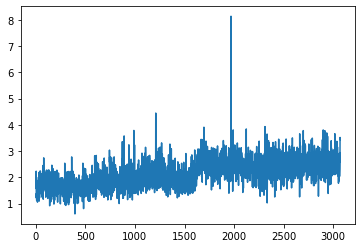

In [6]:
plt.plot(testdata["Energy (kWh)"])

In [7]:
def censor(s):
    energy = s["Energy (kWh)"] 
    energy_lag1 = s["Energy (kWh)_lag1"]
    energy_lag2 = s["Energy (kWh)_lag2"]
    energy_lag3 = s["Energy (kWh)_lag3"]
    energy_lag4 = s["Energy (kWh)_lag4"]
    energy_lag5 = s["Energy (kWh)_lag5"]

    s["Censored"] = False
    if energy > 3:
        s["Energy (kWh)"] = 3
        s["Censored"] = True
    if energy_lag1 > 3:
        s["Energy (kWh)_lag1"] = 3
    if energy_lag2 > 3:
        s["Energy (kWh)_lag2"] = 3
    if energy_lag3 > 3:
        s["Energy (kWh)_lag3"] = 3
    if energy_lag4 > 3:
        s["Energy (kWh)_lag4"] = 3
    if energy_lag5 > 3:
        s["Energy (kWh)_lag5"] = 3
    
    return s

In [8]:
testdata = testdata.apply(censor, axis=1)

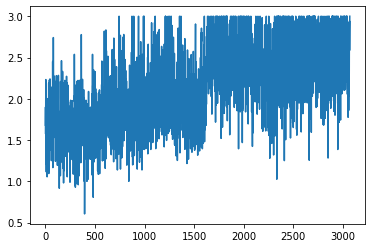

In [9]:
plt.plot(testdata["Energy (kWh)"])

In [10]:
testdata[testdata["Censored"] == False].shape

(2927, 84)

In [11]:
testdata["Energy (kWh)"]

0       1.679882
1       1.899242
2       1.574471
3       1.982032
4       2.232860
          ...   
3066    2.830458
3067    2.942766
3068    2.586043
3069    3.000000
3070    3.000000
Name: Energy (kWh), Length: 3071, dtype: float64

In [12]:
t = Tobit(testdata, 'Censored', ["Energy (kWh)_lag1","Energy (kWh)_lag2","Energy (kWh)_lag3","Energy (kWh)_lag4","Energy (kWh)_lag5"], 'Energy (kWh)')

In [13]:
sd = np.linspace(0.0001,1, 40)
nlls = []
for i in sd:
    nlls.append(t.nll(i,3))


IndexError: invalid index to scalar variable.

In [ ]:
plt.plot(sd,nlls)
plt.show()

In [15]:
regressor = LinearRegression().fit(np.array(testdata[["Energy (kWh)_lag1","Energy (kWh)_lag2","Energy (kWh)_lag3","Energy (kWh)_lag4","Energy (kWh)_lag5"]]), testdata["Energy (kWh)"])
pred = regressor.predict(np.array(testdata[["Energy (kWh)_lag1","Energy (kWh)_lag2","Energy (kWh)_lag3","Energy (kWh)_lag4","Energy (kWh)_lag5"]]))

In [13]:
regressor = LinearRegression().fit(np.array(testdata[["Energy (kWh)_lag1"]]), testdata["Energy (kWh)"])
pred = regressor.predict(np.array(testdata[["Energy (kWh)_lag1"]]))

In [16]:
vars = regressor.coef_


In [17]:
vars = np.append(vars,0.3)

In [18]:
minimizer = t.minimize(vars,3)

 1.40933356 1.39824986 1.29456174 1.3842233  1.38844896
 1.40892262 1.3982091  1.28506874 1.48009762 1.51324277 1.53150288
 1.31867501 1.16506642 1.26449745 1.35721806 1.49477049 1.17878604
 1.22630918 1.23707036 1.32928645 1.34122456 1.27600768 1.34968549
 1.27345279 1.376837   1.33666127 1.30990872 1.31667804 1.34955075
 1.44360854 1.22064502 1.31686428 1.28364272 1.31224336 1.26685522
 1.41746943 1.41890673 1.40183176 1.43543073 1.31827769 1.21092772
 1.27773286 1.36978698 1.37573936 1.38177229 1.30540119 1.33496569
 1.33327273 1.29016972 1.40831824 1.36881984 1.10541092 1.25962124
 1.27006895 1.41154536 1.26422584 1.382257   1.35024382 1.44131045
 1.39024932 1.2691132  1.32788108 1.31138312 1.42791864 1.21432795
 1.27743722 1.35238585 1.40417752 1.32619436 1.37126832 1.36153177
 1.48249536 1.43244501 1.45464441 1.52734576 1.37106945 1.42020811
 1.37552929 1.44987224 1.31968985 1.38374681 1.33465767 1.2827507
 1.38667809 1.32996391 1.4309085  1.4843312  1.4617073  1.50061224
 1.5452

In [19]:
minimizer["x"]

array([0.10968396, 0.12100972, 0.09674147, 0.13212372, 0.09275707,
       0.51581885])

In [20]:
plt.plot(sd,nlls)
plt.scatter(minimizer["x"], t.nll(minimizer["x"],3))
plt.show()

ValueError: x and y must have same first dimension, but have shapes (40,) and (0,)

In [21]:
sd = minimizer["x"][-1]
beta = minimizer['x'][:-1]

array([0.10968396, 0.12100972, 0.09674147, 0.13212372, 0.09275707])

In [32]:
regressor = LinearRegression().fit(np.array(testdata[["Energy (kWh)_lag1","Energy (kWh)_lag2","Energy (kWh)_lag3","Energy (kWh)_lag4","Energy (kWh)_lag5"]]), testdata["Energy (kWh)"])
pred = regressor.predict(np.array(testdata[["Energy (kWh)_lag1","Energy (kWh)_lag2","Energy (kWh)_lag3","Energy (kWh)_lag4","Energy (kWh)_lag5"]]))

In [33]:
regressor.coef_

array([0.18107919, 0.16463001, 0.16186996, 0.17187732, 0.13269433])

In [21]:
testdata["Energy (kWh)_lag1"].max()

3.0

In [39]:
pred_tobit = np.dot(np.array(testdata[["Energy (kWh)_lag1","Energy (kWh)_lag2","Energy (kWh)_lag3","Energy (kWh)_lag4","Energy (kWh)_lag5"]]),beta)

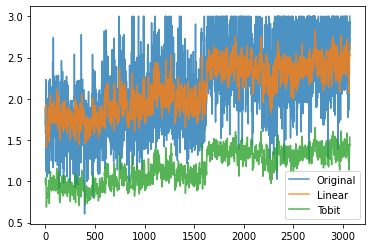

In [46]:
plt.plot(testdata["Energy (kWh)"], label = "Original", alpha = 0.8)
plt.plot(pred, label = "Linear", alpha = 0.8)
plt.plot(pred_tobit, label = "Tobit", alpha = 0.8)
plt.legend()
plt.show()

In [47]:
r2_score(testdata["Energy (kWh)"], pred_tobit)

-3.7072662545943045

In [48]:
r2_score(testdata["Energy (kWh)"], pred)

0.38186564510234366

In [86]:
def nll(sd):
    y_not_censored = testdata["Energy (kWh)"][testdata["Censored"] == False]
    y_pred_not_censored = t.linear_regression(False)

    ll_not_censored = tf.math.reduce_sum(np.log(1/sd * norm.pdf((y_not_censored - y_pred_not_censored)/sd)))

    y_censored = testdata["Energy (kWh)"][testdata["Censored"] == True]
    y_pred_censored = t.linear_regression(True)
    ll_censored = tf.math.reduce_sum(np.log(norm.cdf((y_censored - y_pred_censored)/sd)))

    return float(- ll_not_censored - ll_censored)

In [113]:
y_censored = testdata["Energy (kWh)"][testdata["Censored"] == True]
y_pred_censored = t.linear_regression(True)
tf.math.reduce_sum(np.log(norm.cdf((y_censored - y_pred_censored)/2)))

<tf.Tensor: shape=(), dtype=float64, numpy=-63.38043014430555>

In [119]:
sum(np.log(norm.cdf((y_censored - y_pred_censored)/0.06)))

-0.004717613610609299

In [24]:
import tensorflow_probability as tfp

In [36]:
def tobit_type1_nll_tensorflow(y_true, y_pred, noise_sigma, upper_threshold):
    def get_cens_labels(y_true):
        return y_true >= upper_threshold
    
    def nll_not_censored(y_true, y_pred, noise_sigma):
        return -tf.math.reduce_sum(
            np.log(1 / noise_sigma) + \
            tfp.distributions.Normal(loc=0, scale=1).log_prob(
                (tf.boolean_mask(y_true, ~get_cens_labels(y_true)) - \
                 tf.boolean_mask(y_pred, ~get_cens_labels(y_true)) \
                ) / noise_sigma))
    
    def nll_censored(y_true, y_pred, noise_sigma, upper_threshold):
        return -tf.math.reduce_sum(
            tfp.distributions.Normal(loc=0, scale=1)\
                .log_cdf((tf.boolean_mask(y_pred, get_cens_labels(y_true)) - upper_threshold) \
                         / noise_sigma))
    
    
    

    return \
        nll_not_censored(y_pred=y_pred, 
                         y_true=y_true, 
                         noise_sigma=noise_sigma) + \
        nll_censored(y_true=y_true,
                     y_pred=y_pred,
                     noise_sigma=noise_sigma,
                     upper_threshold=upper_threshold)

In [37]:
tobit_type1_nll_tensorflow(testdata["Energy (kWh)"].astype('float32'), pred.astype('float32'), sd, 3)

<tf.Tensor: shape=(), dtype=float32, numpy=1920.4941>

In [41]:
minimize(tobit_type1_nll_tensorflow, 0.01,method="BFGS", args=(testdata["Energy (kWh)"].astype('float32'),pred.astype('float32'),3))

ValueError: Shapes (3071,) and (1,) are incompatible